In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    r2_score, mean_squared_error
)

import joblib
import os
sns.set()

In [121]:
data=pd.read_csv('Train.csv')

In [122]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [123]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [124]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
print("Missing values after filling:", data['Item_Weight'])
print("Missing values after filling:", data['Item_Weight'].isnull().sum())

Missing values after filling: 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64
Missing values after filling: 0


C:\Users\athun\AppData\Local\Temp\ipykernel_20256\2818495977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)


In [125]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [126]:
# mode of "Outlet_Size" column
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [127]:
# Step 1: Get mode of Outlet_Size for each Outlet_Type
mode_of_outlet_size = data.pivot_table(
    values='Outlet_Size',
    columns='Outlet_Type',
    aggfunc=lambda x: x.mode()[0]
)

print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [128]:
# Step 2: Identify missing Outlet_Size entries
missing_values_mask = data['Outlet_Size'].isnull()

print("Missing values in Outlet_Size:", missing_values_mask)

Missing values in Outlet_Size: 0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [129]:

# Step 3: Fill missing Outlet_Size based on Outlet_Type
data.loc[missing_values_mask, 'Outlet_Size'] = data.loc[missing_values_mask, 'Outlet_Type'].apply(
    lambda outlet_type: mode_of_outlet_size[outlet_type]
)

In [130]:
# Display the first few rows of the dataset
print(data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [131]:
# checking for missing values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [132]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\Users\athun\AppData\Local\Temp\ipykernel_20256\135809402.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


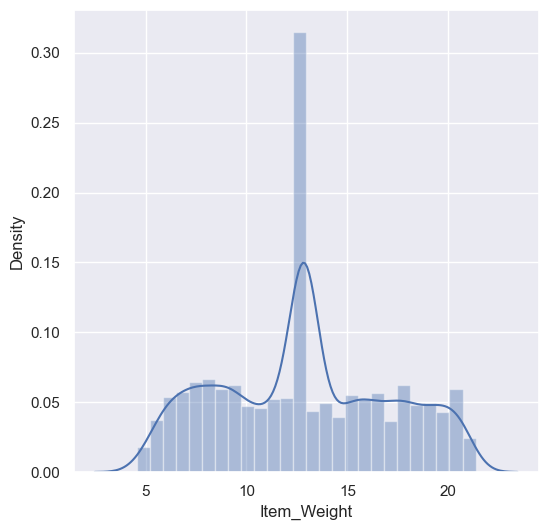

In [133]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()

C:\Users\athun\AppData\Local\Temp\ipykernel_20256\777742969.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


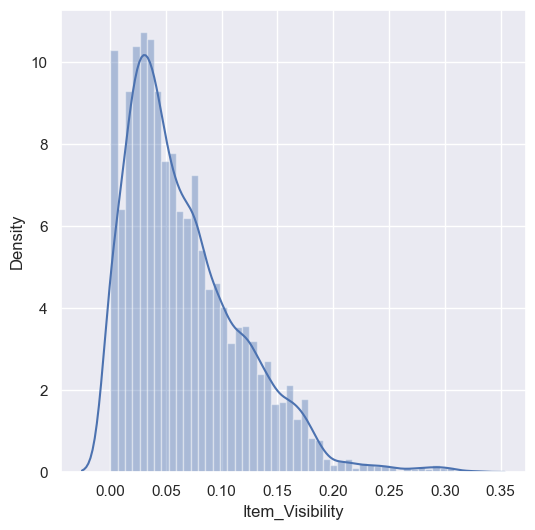

In [134]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility'])
plt.show()

C:\Users\athun\AppData\Local\Temp\ipykernel_20256\1434363897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


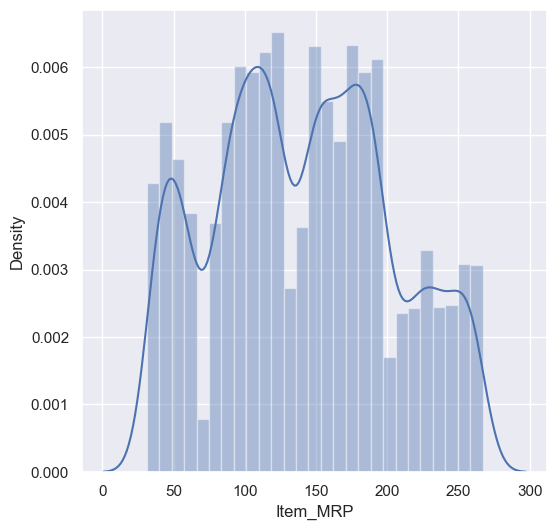

In [135]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

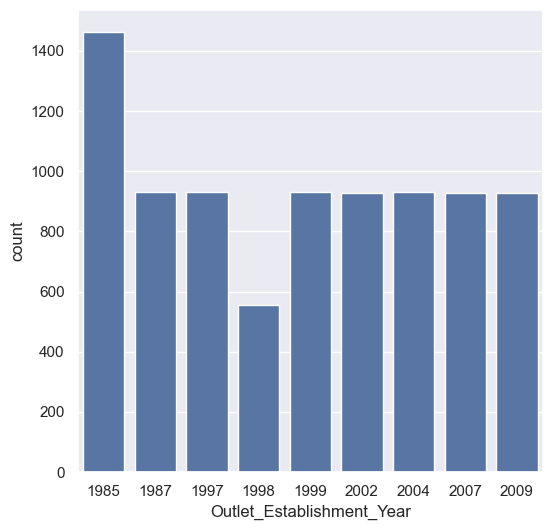

In [136]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()

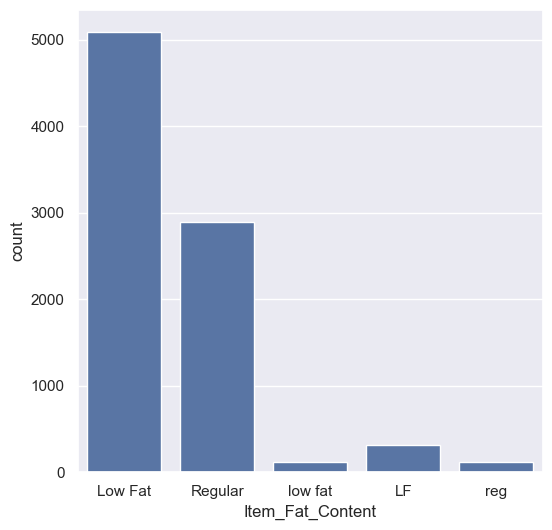

In [137]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=data)
plt.show()

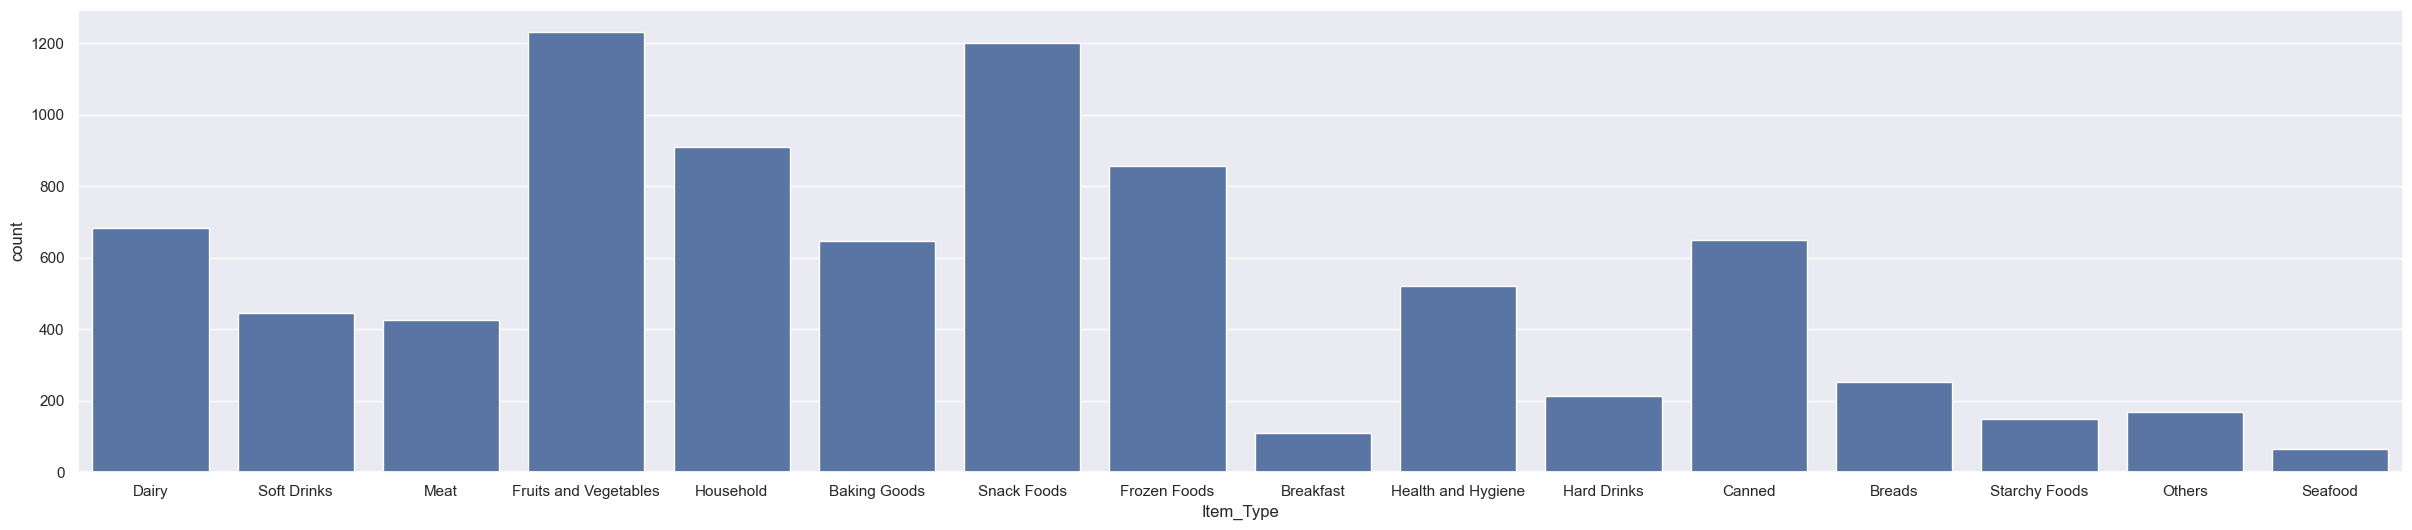

In [138]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

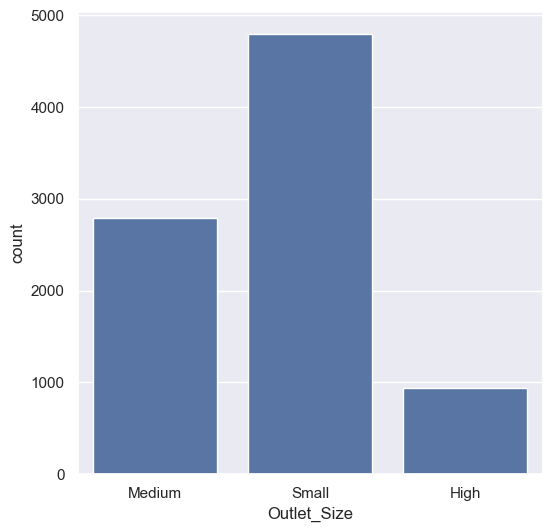

In [139]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=data)
plt.show()

Data Pre-Processing

In [140]:

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [141]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [142]:
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [143]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label encoding

In [144]:
encoder = LabelEncoder()
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [145]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [147]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (7670, 11) (853, 11)


In [148]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor
)
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        'Random Forest Regressor': RandomForestRegressor(),
        'KNN Regressor': KNeighborsRegressor(),
        'SVR': SVR(),
        'Gradient Boosting Regressor': GradientBoostingRegressor()
    }

In [149]:
save_path = "saved_models"
os.makedirs(save_path, exist_ok=True)
problem_type = 'regression'  # Change to 'classification' if needed


🚀 Training and Evaluating: Linear Regression
💾 Model saved at: saved_models\linear_regression.pkl
📚 Cross-Validation Mean Score: 0.5015
✅ R² Score: 0.4902
✅ RMSE: 1280.2069
accuracy0.13481828839390386


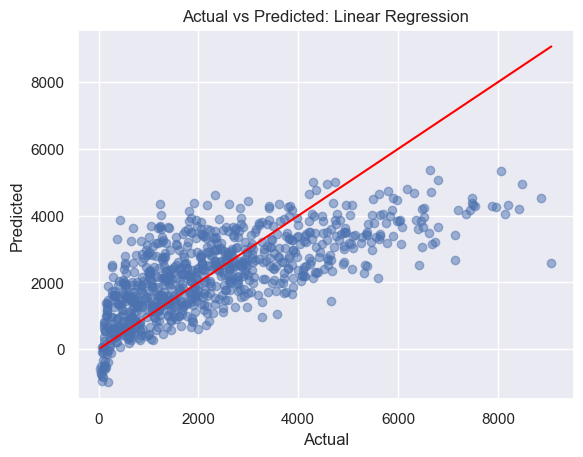


🚀 Training and Evaluating: Decision Tree Regressor
💾 Model saved at: saved_models\decision_tree_regressor.pkl
📚 Cross-Validation Mean Score: 0.1553
✅ R² Score: 0.1778
✅ RMSE: 1625.7523
accuracy0.13716295427901523


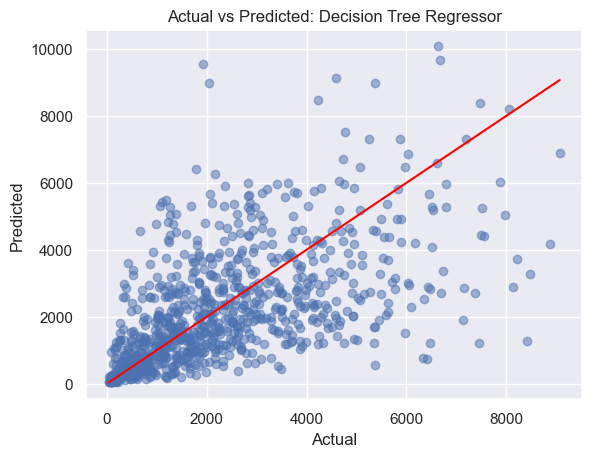


🚀 Training and Evaluating: Random Forest Regressor
💾 Model saved at: saved_models\random_forest_regressor.pkl
📚 Cross-Validation Mean Score: 0.5491
✅ R² Score: 0.5452
✅ RMSE: 1209.1338
accuracy0.16412661195779601


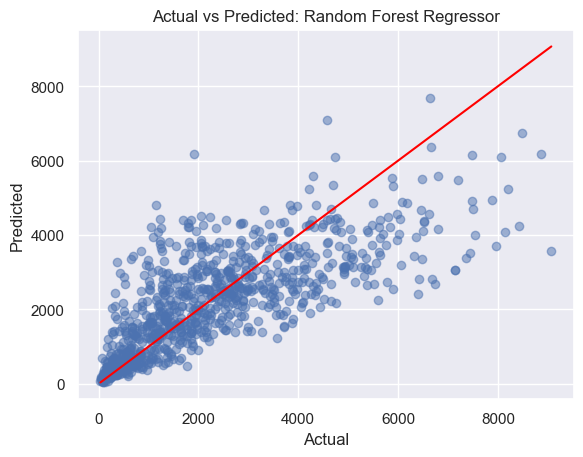


🚀 Training and Evaluating: KNN Regressor
💾 Model saved at: saved_models\knn_regressor.pkl
📚 Cross-Validation Mean Score: 0.1901
✅ R² Score: 0.1501
✅ RMSE: 1652.9145
accuracy0.11137162954279015


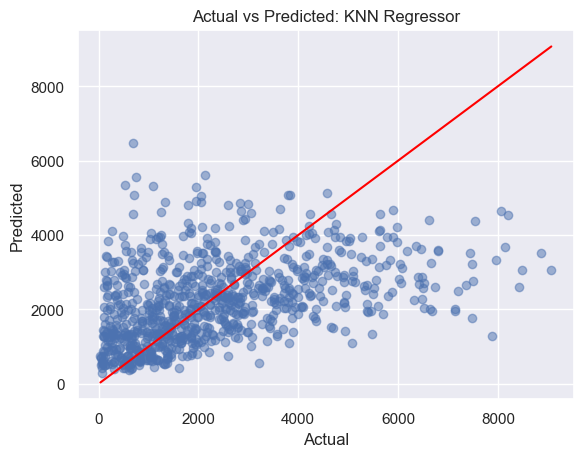


🚀 Training and Evaluating: SVR
💾 Model saved at: saved_models\svr.pkl
📚 Cross-Validation Mean Score: -0.0486
✅ R² Score: -0.0903
✅ RMSE: 1872.1715
accuracy0.09261430246189918


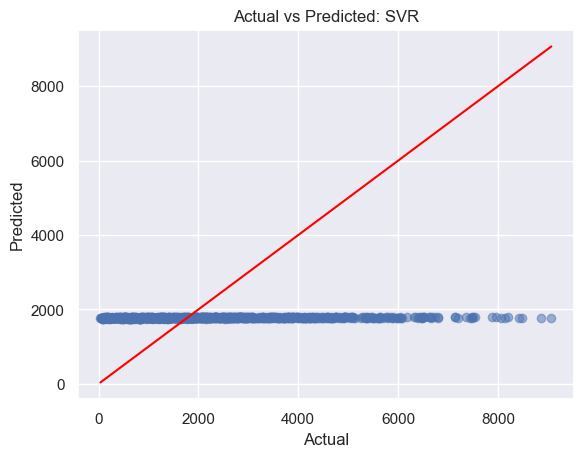


🚀 Training and Evaluating: Gradient Boosting Regressor
💾 Model saved at: saved_models\gradient_boosting_regressor.pkl
📚 Cross-Validation Mean Score: 0.5918
✅ R² Score: 0.5802
✅ RMSE: 1161.6788
accuracy0.17233294255568582


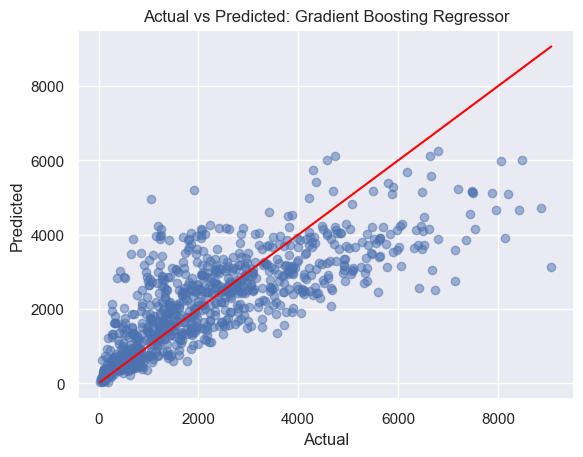

In [150]:
results = []

for name, model in models.items():
    print(f"\n🚀 Training and Evaluating: {name}")
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    # Save the model
    filename = os.path.join(save_path, name.replace(" ", "_").lower() + ".pkl")
    joblib.dump(model, filename)
    print(f"💾 Model saved at: {filename}")

    # Cross-Validation (5-fold)
    cv_scores = cross_val_score(model, X, Y, cv=5)
    mean_cv = np.mean(cv_scores)
    print(f"📚 Cross-Validation Mean Score: {mean_cv:.4f}")

    if problem_type == 'regression':
       
       r2 = r2_score(Y_test, y_pred)
       rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
       print(f"✅ R² Score: {r2:.4f}")
       print(f"✅ RMSE: {rmse:.4f}")
       threshold = 0.1  # 10%
       accuracy = np.mean(np.abs((y_pred - Y_test) / Y_test) < threshold)
       print(f'accuracy{accuracy}')# Regression Scatter Plot
       plt.scatter(Y_test, y_pred, alpha=0.5)
       plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red')
       plt.title(f'Actual vs Predicted: {name}')
       plt.xlabel('Actual')
       plt.ylabel('Predicted')
       plt.grid(True)
       plt.show()
       
       results.append({'Model': name, 'R2 Score': r2, 'RMSE': rmse, 'Cross-Val Score': mean_cv,accuracy: accuracy})

In [151]:
results_df = pd.DataFrame(results)
print("\n📈 Final Model Comparison Table:")
display(results_df)



📈 Final Model Comparison Table:


,Model,R2 Score,RMSE,Cross-Val Score,0.134818,0.137163,0.164127,0.111372,0.092614,0.172333
0,Linear Regression,0.490170,1280.206918,0.501471,0.134818,NaN,NaN,NaN,NaN,NaN
1,Decision Tree Regressor,0.177807,1625.752328,0.155268,NaN,0.137163,NaN,NaN,NaN,NaN
2,Random Forest Regressor,0.545207,1209.133830,0.549066,NaN,NaN,0.164127,NaN,NaN,NaN
3,KNN Regressor,0.150104,1652.914516,0.190057,NaN,NaN,NaN,0.111372,NaN,NaN
4,SVR,-0.090326,1872.171477,-0.048634,NaN,NaN,NaN,NaN,0.092614,NaN
5,Gradient Boosting Regressor,0.580205,1161.678814,0.591782,NaN,NaN,NaN,NaN,NaN,0.172333
